# Introducción al Machine Learning con Python

## Ejercicio: NMIST Dataset

En este ejemplo vamos a utilizar un dataset de imágenes digitalizadas para entrenar una red neuronal de tipo convolucional con el propósito de poder predecir que dígito representa cada imagen

### Preparación del entorno y datos

Vamos a precisar importar tanto las capas y el modelo de keras como el dataset del mnist
Adicionalmente vamos a necesitar de los arreglos de numpy para manejar los datos y matplotlib para graficar y mostrar imágenes

In [1]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


El dataset MNIST es una base de datos de imágenes de dígitos escritos a mano normalizados y centrados. Cuenta con un conjunto de 60000 imágenes para el dataset de entrenamiento y 10000 para el dataset de prueba

In [2]:
(keras_train_images, keras_train_labels), (test_images, test_labels) = mnist.load_data()

La importación de datos la realizamos de forma similar al ejercicio anterior pero en este caso, ya que vamos a trabajar con imágenes, los datos de entrada deben de ser preparados de forma distina.

A continuación partiremos el conjunto de entrenamiento para contar también con un conjunto de validación
Notese que vamos a quedarnos únicamente con 500 imágenes de entrenamiento y 150 imágenes de validación por propósitos didácticos. Más adelante usaremos un conjunto más completo

In [3]:
train_images = keras_train_images[0:500,]
train_labels = keras_train_labels[0:500]
validation_images = keras_train_images[500:650,]
validation_labels = keras_train_labels[500:650]

In [4]:
train_images = train_images.reshape((500,28,28,1))
train_images = train_images.astype('float32') / 255

La función reshape nos permite redimensionar arreglos de numpy sin alterar sus datos. En este caso lo llevamos a un formato en el que tenemos: 
- 500 imágenes
- Cada una de 28 pixeles de alto
- 28 píxeles de ancho
- 1 canal (ya que las imágenes fueron transformadas a blanco y negro, en caso de color tendríamos 3 canales)
Ya que las redes neuronales convolucionales se desempleñan mucho mejor con valores que van desde 0 a 1 y, en nuestro ejemplo, cada pixel se representa con valores entre 0 y 255, transformamos los datos al tipo flotante para poder dividirlos por 255 y obtener el formato deseado
Lo mismo se aplica al conjunto de datos de validación y prueba

In [5]:
validation_images = validation_images.reshape((150,28,28,1))
validation_images = validation_images.astype('float32') / 255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255

Las etiquetas en este caso van a ser valores que van desde 0 a 9 para poder representar los dígitos escritos a mano

Ya que en el ejercicio anterior aprendimos con las funciones vectorize_sequences y to_one_hot como es el funcionamiento de keras.utils.to_categorical, vamos directamente a utilizar esta última función para el preparado de las mismas

In [6]:
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

### Definición del modelo 

Creamos un modelo secuencial con capas convolutivas para procesar imágenes

In [7]:
def get_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Veamos en detalle las acciones y decisiones que se tomaron para este modelo inicial:
- En este caso no aplicamos capas Dense (completamente conectadas) al principio de la red sino que comenzamos un una capa especial para procesar imágenes en 2D con operaciones convolutivas la cual:
    - Está compuesta por 60 neuronas
    - Cada neurona realiza operacioes convolutivas con un kernel (ventana deslizante) de dimensión 5 x 5
    - Cada entrada a la neurona es una imágnes de 1 canal, y de deimensión 28 x 28
    - Utiliza la función de activación ReLu
- Ya que a la salida esperamos tener pocas neuronas (1 por etiqueta), a medida que vamos avanzando en el modelo la idea es ir reduciendo la red, para eso existe MaxPooling2D, que va calculando máximos con un kernel y reduce la dimensión de las imágenes a la mitad
- La capa de tipo Flatten convierte las estructuras multidimensionales en un arreglo de una dimensión
- Ahora sí es útil aplicar capas de tipo Dense para que obtengan información de cada neurona y reduzcan su número hasta la cantidad de clases (número de etiquetas)
    - Como queremos asignar categorías, en la última capa utilizamos la función de activación softmax que nos asignará el valor de pertenencia de cada neurona de entrada a la capa a cada una de las posibles etiquetas de salida
    
Ahora entrenamos el modelo y guardamos la información del entrenamiento en el objeto history

In [8]:
model = get_model()
history = model.fit(
    train_images,
    train_labels,
    epochs=25,
    validation_data=(validation_images, validation_labels),
)

Train on 500 samples, validate on 150 samples
Epoch 1/25
500/500 [==============================] - 2s 5ms/step - loss: 2.2743 - acc: 0.2020 - val_loss: 2.2167 - val_acc: 0.1867
Epoch 2/25
500/500 [==============================] - 2s 4ms/step - loss: 2.0240 - acc: 0.2800 - val_loss: 1.7647 - val_acc: 0.4667
Epoch 3/25
500/500 [==============================] - 2s 4ms/step - loss: 1.2999 - acc: 0.6080 - val_loss: 1.1477 - val_acc: 0.5867
Epoch 4/25
500/500 [==============================] - 2s 4ms/step - loss: 0.7815 - acc: 0.7480 - val_loss: 0.9074 - val_acc: 0.6867
Epoch 5/25
500/500 [==============================] - 2s 4ms/step - loss: 0.5672 - acc: 0.8480 - val_loss: 0.9125 - val_acc: 0.7133
Epoch 6/25
500/500 [==============================] - 2s 4ms/step - loss: 0.4270 - acc: 0.8820 - val_loss: 0.6866 - val_acc: 0.7933
Epoch 7/25
500/500 [==============================] - 2s 4ms/step - loss: 0.3267 - acc: 0.9200 - val_loss: 0.9033 - val_acc: 0.7400
Epoch 8/25
500/500 [==========

### Evaluación del modelo

Definimos una función que nos permita graficar los parámetros del entrenamiento

In [9]:
def draw_history(history):
    h = history.history
    epochs = range(1, len(h["loss"]) + 1)
    plt.figure(1, figsize=(16, 16))
    plt.clf()
    # primer gráfico
    plt.subplot(221)
    plt.plot(epochs, h["loss"], "bo", label="Error del entrenamiento")
    plt.plot(epochs, h["val_loss"], "b", label="Error de validación")
    plt.xlabel("Épocas")
    plt.ylabel("Error")
    plt.legend()
    # segundo gráfico
    plt.subplot(222)
    plt.plot(epochs, h["acc"], "bo", label="Precisión del entrenamiento")
    plt.plot(epochs, h["val_acc"], "b", label="Precisión de validación")
    plt.xlabel("Épocas")
    plt.ylabel("Preicisión")
    plt.legend()
    # ahora mostramos todo junto
    plt.show()

Graficamos el entrenamiento

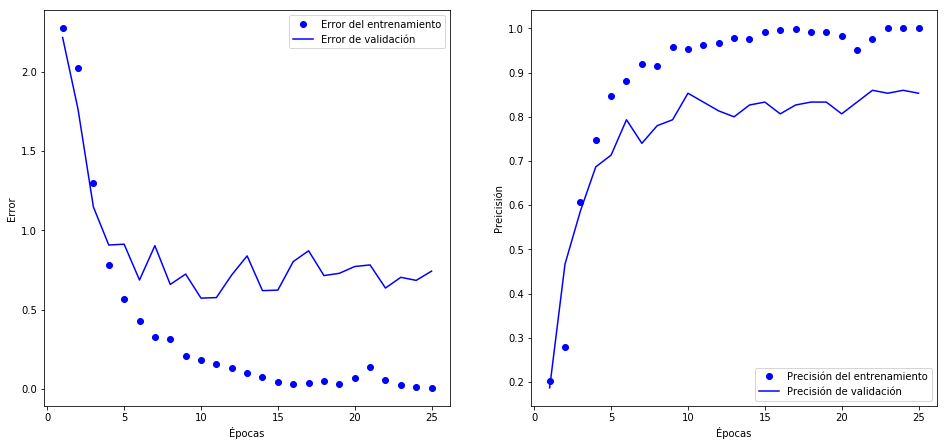

In [10]:
draw_history(history)

Lo primero que observamos aquí es que las curvas de entrenamiento y validación, tanto para el error como la precisión de entrenamiento, comienzan a separarse entre las épocas 4 y 5 

Lo que esto significa es que se está produciendo overfitting o sobreajuste a partir de este momento. La consecuencia de esto es que nuestro modelo perderá generalización, habrá aprendido tanto como predecir con éxito las imágenes de entrenamiento que no será lo suficientemente flexible para adaptarse a un conjunto nuevo

Veamos ahora como se comporta nuestro modelo con predicciones sobre el conjunto de imágenes de prueba

In [11]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 11.68%


Vemos que hay cerca de un 10% de imágenes que no fueron predichas correctamente. Sabemos que no va a servir agregar más épocas para que el modelo siga aprendiendo de nuestros datos por el overfitting.

De todas formas vamos a hacer algunas pruebas viendo como se comporta con imágenes del conjunto de prueba

In [12]:
def predictImage(img):
    pixels = img.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
    img = img.reshape((1,28,28,1))
    pred =model.predict_classes(img)
    print("Valor predicho: "+str(pred[0]))

Probemos con predictImage(test_images[1]) al predictImage(test_images[7]) para que nos muestre las imágenes y predicciones

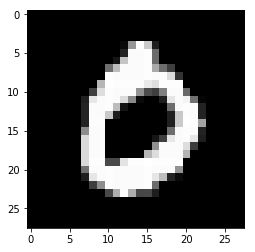

Valor predicho: 0


In [13]:
predictImage(test_images[3])

Como vemos, a pesar de que el porcentaje de error se acerca al 10%, la mayoría de los dígitos son predichos con éxito. Un caso en el que fallará es el la imagen número 8. 
Esta imagen debería predecirse como un 5 o un 6 pero se encuentra muy deformada. Motivo por el cual se requerirá de más imágenes de entrenamiento para poder acertar.

Para esto vamos a quedarnos con 10000 imágenes para entrenamiento y 5000 para validación. En cuanto al ajuste, como ya sabemos que el modelo comienza a sobreajustar muy temprano, reducimos las épocas a 15 y probamos.

In [14]:
train_images = keras_train_images[0:10000,]
train_labels = keras_train_labels[0:10000]
validation_images = keras_train_images[10000:15000,]
validation_labels = keras_train_labels[10000:15000]

In [15]:
train_images = train_images.reshape((10000,28,28,1))
train_images = train_images.astype('float32') / 255
validation_images = validation_images.reshape((5000,28,28,1))
validation_images = validation_images.astype('float32') / 255

In [16]:
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)

In [17]:
model = get_model()
history = model.fit(
    train_images,
    train_labels,
    epochs=15,
    validation_data=(validation_images, validation_labels),
)

Train on 10000 samples, validate on 5000 samples
Epoch 1/15
10000/10000 [==============================] - 43s 4ms/step - loss: 0.6917 - acc: 0.7724 - val_loss: 0.3510 - val_acc: 0.8916
Epoch 2/15
10000/10000 [==============================] - 40s 4ms/step - loss: 0.2230 - acc: 0.9313 - val_loss: 0.2227 - val_acc: 0.9286
Epoch 3/15
10000/10000 [==============================] - 31s 3ms/step - loss: 0.1490 - acc: 0.9545 - val_loss: 0.2118 - val_acc: 0.9318
Epoch 4/15
10000/10000 [==============================] - 40s 4ms/step - loss: 0.1099 - acc: 0.9671 - val_loss: 0.1433 - val_acc: 0.9544
Epoch 5/15
10000/10000 [==============================] - 38s 4ms/step - loss: 0.0896 - acc: 0.9710 - val_loss: 0.1496 - val_acc: 0.9548
Epoch 6/15
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0761 - acc: 0.9787 - val_loss: 0.0993 - val_acc: 0.9702
Epoch 7/15
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0544 - acc: 0.9830 - val_loss: 0.1022 - val_acc:

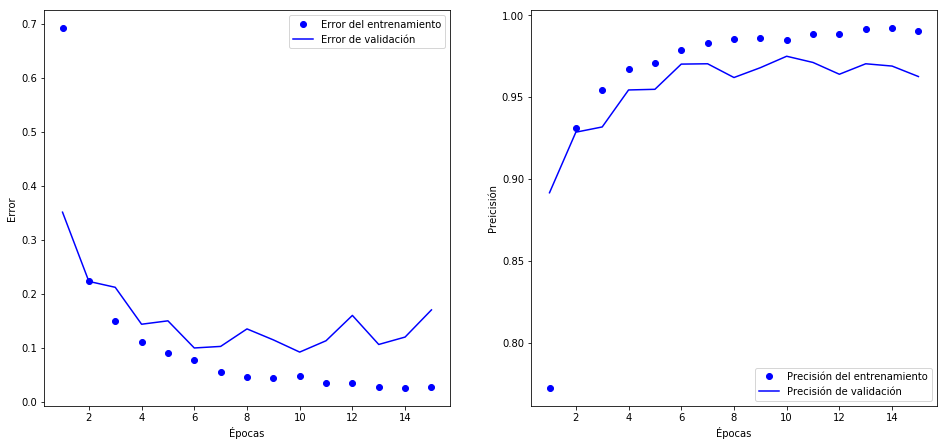

In [18]:
draw_history(history)

In [19]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 3.18%


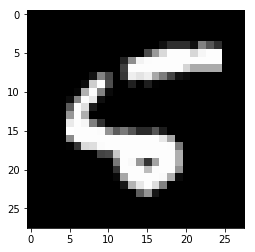

Valor predicho: 5


In [20]:
predictImage(test_images[8])

Vemos ahora que el porcentaje de error se redujo considerablemente y las predicciones sobre imágenes no del todo definidas devuelven valores más precisos

De todas formas seguimos teniendo el problema de overfitting por lo que nos limitaremos a 4 épocas y ajustaremos nuevamente el modelo

In [21]:
model = get_model()
history = model.fit(
    train_images,
    train_labels,
    epochs=4,
    validation_data=(validation_images, validation_labels),
)

Train on 10000 samples, validate on 5000 samples
Epoch 1/4
10000/10000 [==============================] - 29s 3ms/step - loss: 0.6986 - acc: 0.7704 - val_loss: 0.2986 - val_acc: 0.9110
Epoch 2/4
10000/10000 [==============================] - 32s 3ms/step - loss: 0.1940 - acc: 0.9398 - val_loss: 0.2025 - val_acc: 0.9380
Epoch 3/4
10000/10000 [==============================] - 29s 3ms/step - loss: 0.1290 - acc: 0.9600 - val_loss: 0.1497 - val_acc: 0.9570
Epoch 4/4
10000/10000 [==============================] - 29s 3ms/step - loss: 0.0958 - acc: 0.9707 - val_loss: 0.1143 - val_acc: 0.9640


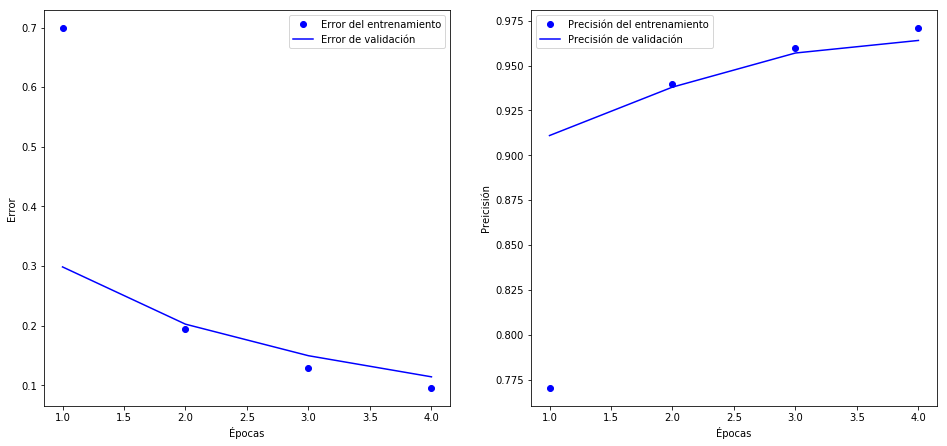

In [22]:
draw_history(history)

In [23]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 3.04%


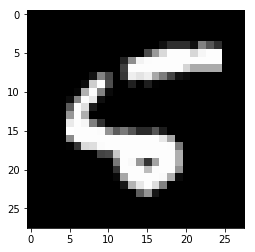

Valor predicho: 5


In [24]:
predictImage(test_images[8])

¿Qué nos resta para hacer?

Tendríamos que definir un límite de precisión de predicción de nuestro modelo. No tiene sentido que termine acertando dígitos que difícilmente sean reconocibles por el hombre

¿De qué manera podríamos seguir mejorandolo?